In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import bz2
from glob import glob
import imageio
import json
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from IPython import display

In [2]:
!pip install tables

     |████████████████████████████████| 5.9 MB 593 kB/s            


In [3]:
sns.set(rc={'figure.figsize':(15,10)})
length = 105
width = 68

In [4]:
def create_pitch(length, width, linecolor, bounds = 15):

    """
    mainly stolen from fc python
    param length: an int the length of the field
    param width: an int the height of the field
    param linecolor: the color of the lines
"""
    #Create figure
    fig=plt.figure()
    #fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)

    #Pitch Outline & Centre Line
    plt.plot([0,0],[0,width], color=linecolor)
    plt.plot([0,length],[width,width], color=linecolor)
    plt.plot([length,length],[width,0], color=linecolor)
    plt.plot([length,0],[0,0], color=linecolor)
    plt.plot([length/2,length/2],[0,width], color=linecolor)
    plt.fill_between(x = [-bounds, length+bounds],
                     y1 = [width+bounds, width + bounds],
                     y2 = [-bounds, -bounds], color='green')

    #Left Penalty Area
    plt.plot([16.5 ,16.5],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([0,16.5],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([16.5,0],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Right Penalty Area
    plt.plot([(length-16.5),length],[(width/2 +16.5),(width/2 +16.5)],color=linecolor)
    plt.plot([(length-16.5), (length-16.5)],[(width/2 +16.5),(width/2-16.5)],color=linecolor)
    plt.plot([(length-16.5),length],[(width/2 -16.5),(width/2 -16.5)],color=linecolor)

    #Left 5-meters Box
    plt.plot([0,5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([5.5,5.5],[(width/2+7.32/2+5.5),(width/2-7.32/2-5.5)],color=linecolor)
    plt.plot([5.5,0.5],[(width/2-7.32/2-5.5),(width/2-7.32/2-5.5)],color=linecolor)

    #Right 5-meters Box
    plt.plot([length,length-5.5],[(width/2+7.32/2+5.5),(width/2+7.32/2+5.5)],color=linecolor)
    plt.plot([length-5.5,length-5.5],[(width/2+7.32/2+5.5),width/2-7.32/2-5.5],color=linecolor)
    plt.plot([length-5.5,length],[width/2-7.32/2-5.5,width/2-7.32/2-5.5],color=linecolor)

    #Prepare Circles
    centreCircle = plt.Circle((length/2,width/2),9.15,color=linecolor,fill=False)
    centreSpot = plt.Circle((length/2,width/2),0.8,color=linecolor)
    leftPenSpot = plt.Circle((11,width/2),0.8,color=linecolor)
    rightPenSpot = plt.Circle((length-11,width/2),0.8,color=linecolor)

    #Draw Circles
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    #Prepare Arcs
    leftArc = Arc((11,width/2),height=18.3,width=18.3,angle=0,theta1=308,theta2=52,color=linecolor)
    rightArc = Arc((length-11,width/2),height=18.3,width=18.3,angle=0,theta1=128,theta2=232,color=linecolor)

    #Draw Arcs
    ax.add_patch(leftArc)
    ax.add_patch(rightArc)
            #Axis titles
    #Tidy Axes
    plt.axis('off')
    
    return fig,ax

In [5]:
match_results = pd.read_csv("../input/euro-cup-2020/eurocup_2020_results.csv")
#original dataset has whitespaces, so annoying
match_results[['team_name_home', 'team_name_away']] = match_results[['team_name_home', 'team_name_away']].applymap(lambda x: str.strip(x))

In [6]:
iw_mask = (match_results.team_name_home == "Italy") & (match_results.team_name_away == "Wales")
italy_wales = match_results[iw_mask]

In [7]:
italy_wales_matches = match_results['team_name_home'].isin(["Italy", "Wales"]) | match_results['team_name_away'].isin(["Italy", "Wales"])
iw_matches = match_results[italy_wales_matches]

In [8]:
iw_matches.head(2)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,events_list,lineup_home,lineup_away
0,Final,11.07.2021,True,3,2,Italy,England,1,1,66%,34%,19,6,6,2,53%,47%,"[{'event_team': 'away', 'event_time': "" 2' "", ...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Kane', 'Player_Number': '9'}..."
2,Semi-finals,06.07.2021,True,4,2,Italy,Spain,1,1,29%,71%,7,16,4,5,49%,51%,"[{'event_team': 'away', 'event_time': "" 51' "",...","[{'Player_Name': 'Insigne', 'Player_Number': '...","[{'Player_Name': 'Torres', 'Player_Number': '1..."


In [9]:

with open('../input/socceranalytics/matches.json') as f:
    data = json.load(f)
    matches = pd.json_normalize(data, sep = "_")

In [10]:
matches.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_competition_id', 'competition_country_name',
       'competition_competition_name', 'season_season_id',
       'season_season_name', 'home_team_home_team_id',
       'home_team_home_team_name', 'home_team_home_team_gender',
       'home_team_home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers',
       'away_team_away_team_id', 'away_team_away_team_name',
       'away_team_away_team_gender', 'away_team_away_team_group',
       'away_team_country_id', 'away_team_country_name', 'away_team_managers',
       'metadata_data_version', 'metadata_shot_fidelity_version',
       'metadata_xy_fidelity_version', 'competition_stage_id',
       'competition_stage_name', 'stadium_id', 'stadium_name',
       'stadium_country_id', 'stadium_country_name', 'referee_id',
       're

In [11]:
matches['home_team_managers'].iloc[0]

[{'id': 3622,
  'name': 'Markku Kanerva',
  'nickname': None,
  'dob': '1964-05-24',
  'country': {'id': 77, 'name': 'Finland'}}]

In [12]:
to_drop = ['away_team_away_team_gender',
           'home_team_home_team_gender',
           'competition_country_name',
           'competition_competition_id',
           'last_updated_360',
           'last_updated',
           'season_season_name',
           'competition_competition_name',
           'competition_competition_id',
           'match_status',
           'match_week']
matches = matches.drop(to_drop, axis=1)

In [13]:
mask = (matches["home_team_home_team_name"] == "Italy") | (matches["away_team_away_team_name"] == "Italy")
italy_matches = matches[mask]
mask = (matches["home_team_home_team_name"] == "Wales") | (matches["away_team_away_team_name"] == "Wales")
wales_matches = matches[mask]

In [14]:
match_id = italy_matches[italy_matches["away_team_away_team_name"] == "Wales"].match_id.iloc[0]

In [15]:
wales_matches

,match_id,match_date,kick_off,home_score,away_score,match_status_360,season_season_id,home_team_home_team_id,home_team_home_team_name,home_team_home_team_group,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
23,3794689,2021-06-26,18:00:00.000,0,4,available,43,907,Wales,None,...,33,Round of 16,4815,Johan Cruijff Arena (Amsterdam),160,Netherlands,225,Daniel Siebert,85,Germany
27,3788766,2021-06-20,18:00:00.000,1,0,available,43,914,Italy,Group A,...,10,Group Stage,381,Stadio Olimpico (Roma),112,Italy,448,Ovidiu Alin Hațegan,187,Romania
29,3788755,2021-06-16,18:00:00.000,0,2,available,43,909,Turkey,Group A,...,10,Group Stage,4549,Bakı Olimpiya Stadionu,16,Azerbaijan,2445,Artur Manuel Ribeiro Soares Dias,183,Portugal
50,3788744,2021-06-12,15:00:00.000,1,1,available,43,907,Wales,Group A,...,10,Group Stage,4549,Bakı Olimpiya Stadionu,16,Azerbaijan,76,Clément Turpin,78,France


In [16]:
import bz2
zipfile = bz2.BZ2File(f"../input/socceranalytics/three-sixty/three-sixty/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    threesixty = json.load(f)
    match_events360 = pd.json_normalize(threesixty)


In [17]:
zipfile = bz2.BZ2File(f"../input/socceranalytics/events/events/{match_id}.json.bz2")
file = zipfile.read()
open(f"{match_id}.json", 'wb').write(file)
with open(f"{match_id}.json") as f:
    events = json.load(f)
    match_events = pd.json_normalize(events[2:], sep = "_")

In [18]:
shots = match_events[match_events['type_name'] == 'Shot']
passes = match_events[match_events['type_name'] == 'Pass']

In [19]:
def restore_df(path):
    with pd.HDFStore(path, mode = 'r') as store:
        df = store.get('df')
        df.attrs = store.get_storer('df').attrs.my_attribute
        return df

In [20]:
goal = shots[shots['shot_outcome_name']=='Goal'][['location','player_name', 'timestamp']]

In [21]:
first_half_start="2021-06-20T16:00:41.126" 
first_half_end="2021-06-20T16:45:43.02"
snd_half_start="2021-06-20T17:02:35.054" 
snd_half_end="2021-06-20T17:50:34.332"

In [22]:
start = pd.to_datetime(first_half_start)

In [23]:
df = restore_df('../input/socceranalytics/dfmeta/dfmeta/italyvwales.h5')

In [24]:
goal_time = start + pd.Timedelta(goal['timestamp'].iloc[0])

In [25]:
goal_time

Timestamp('2021-06-20 16:38:56.646000')

In [26]:
import datetime as dt

In [27]:
df.attrs['player_map']

{'106737': 'Salvatore Sirigu',
 '250078922': 'Gianluigi Donnarumma',
 '250066753': 'Alex Meret',
 '250064229': 'Giovanni Di Lorenzo',
 '59142': 'Giorgio Chiellini',
 '250020885': 'Leonardo Spinazzola',
 '250100056': 'Emerson',
 '250052957': 'Francesco Acerbi',
 '250017925': 'Leonardo Bonucci',
 '250091199': 'Alessandro Bastoni',
 '250026962': 'Alessandro Florenzi',
 '250112488': 'Rafael Tolói',
 '250066747': 'Manuel Locatelli',
 '250006200': 'Marco Verratti',
 '250138434': 'Gaetano Castrovilli',
 '250067749': 'Jorginho',
 '250121401': 'Matteo Pessina',
 '250041741': 'Bryan Cristante',
 '250066739': 'Nicolò Barella',
 '250061597': 'Federico Bernardeschi',
 '250050378': 'Andrea Belotti',
 '250026037': 'Lorenzo Insigne',
 '250058759': 'Domenico Berardi',
 '250090398': 'Federico Chiesa',
 '250005254': 'Ciro Immobile',
 '250105617': 'Giacomo Raspadori',
 '74897': 'Wayne Hennessey',
 '250012939': 'Danny Ward',
 '250100010': 'Adam Davies',
 '102221': 'Chris Gunter',
 '250113272': 'Neco Willia

In [28]:
pes_cols = ['250121401_x', '250121401_y', 'ball_x', 'ball_y']
pes_goool = df[(df['time'] > (goal_time - dt.timedelta(seconds = 1))) & (df['time'] < goal_time + dt.timedelta(seconds = 1))][pes_cols]

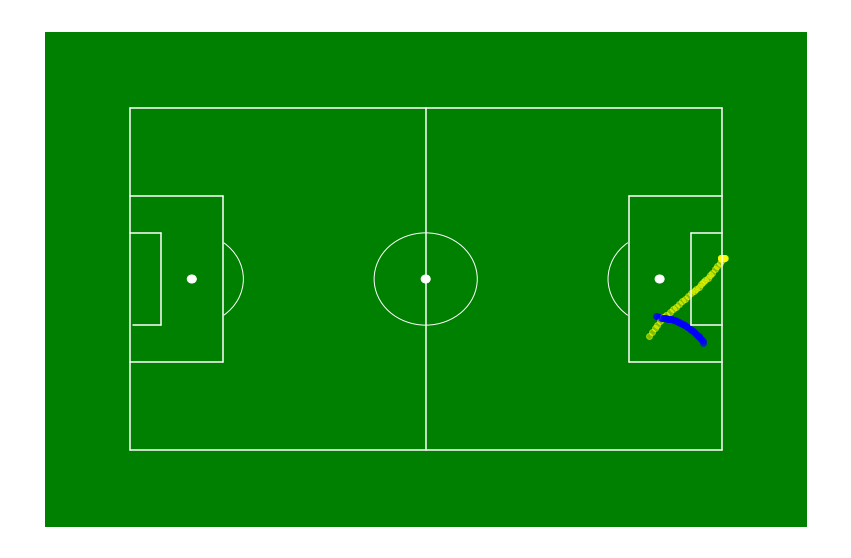

In [29]:
length, width = 105, 68
fig, ax = create_pitch(length, width,'white')
for i, row in pes_goool.iterrows():
    x, y, bx, by = row.to_numpy() / 100
    x = length/2.0 + x
    y = width/2.0 + y
    bx = length/2.0 + bx
    by = width/2.0 + by
    plt.scatter(x,y, marker = 'o', color = 'blue', alpha = 0.5)
    plt.scatter(bx,by, marker = 'o', color = 'yellow', alpha = 0.5)

plt.show()

In [30]:
shots['total_seconds'] = shots['minute'] * 60 + shots['second']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
for col in shots.columns:
    print(col)

id
index
period
timestamp
minute
second
possession
duration
related_events
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_type_id
pass_type_name
pass_body_part_id
pass_body_part_name
carry_end_location
under_pressure
counterpress
pass_outcome_id
pass_outcome_name
ball_receipt_outcome_id
ball_receipt_outcome_name
duel_type_id
duel_type_name
pass_aerial_won
duel_outcome_id
duel_outcome_name
dribble_outcome_id
dribble_outcome_name
pass_switch
pass_cross
interception_outcome_id
interception_outcome_name
off_camera
clearance_head
clearance_body_part_id
clearance_body_part_name
clearance_aerial_won
out
foul_committed_advantage
foul_won_advantage
pass_assisted_shot_id
pass_shot_assist
shot_statsbomb_xg
shot_end_location
shot_key_pass_id
shot_outcome_id
shot_out

In [32]:
shot_cols = [col for col in shots.columns if 'shot' in col]
cols_ = ['timestamp', 'total_seconds', 'position_name', 'location', 'player_name']
shotr = shots[cols_ + shot_cols]

In [33]:
shotr

,timestamp,total_seconds,position_name,location,player_name,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,...,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_first_time,shot_freeze_frame,shot_redirect,shot_deflected
443,00:11:05.681,665,Center Forward,"[115.6, 43.6]",Andrea Belotti,NaN,NaN,0.313013,"[120.0, 46.7, 1.1]",7d5f132d-f953-4cbb-8794-5fdaed616253,...,87.0,Open Play,40.0,Right Foot,95.0,Volley,True,"[{'location': [112.1, 48.6], 'player': {'id': ...",NaN,NaN
540,00:14:14.318,854,Left Back,"[91.2, 26.2]",Emerson Palmieri dos Santos,NaN,NaN,0.014014,"[117.3, 39.7, 0.5]",7c5870aa-e246-41ee-9b53-a1e8d14ecb37,...,87.0,Open Play,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [86.6, 30.6], 'player': {'id': 3...",NaN,NaN
647,00:16:20.148,980,Right Back,"[97.3, 51.8]",Rafael Tolói,NaN,NaN,0.016376,"[105.4, 40.8]",NaN,...,87.0,Open Play,40.0,Right Foot,95.0,Volley,True,"[{'location': [97.3, 33.0], 'player': {'id': 2...",NaN,NaN
649,00:16:20.567,980,Right Center Midfield,"[105.7, 40.9]",Matteo Pessina,NaN,NaN,0.198156,"[116.0, 42.2, 0.5]",NaN,...,87.0,Open Play,40.0,Right Foot,91.0,Half Volley,NaN,"[{'location': [111.2, 43.8], 'player': {'id': ...",True,NaN
955,00:23:40.866,1420,Center Forward,"[112.6, 51.6]",Andrea Belotti,NaN,NaN,0.232000,"[120.0, 26.1, 0.1]",1b06ad71-9c5d-4f9a-b80c-65c490d96ebd,...,87.0,Open Play,40.0,Right Foot,93.0,Normal,True,"[{'location': [98.9, 39.7], 'player': {'id': 2...",NaN,NaN
1049,00:26:21.756,1581,Left Center Back,"[110.7, 34.4]",Chris Gunter,NaN,NaN,0.065273,"[120.0, 35.6, 2.9]",6870c73b-1bba-48b8-bd54-b12ceb0829d9,...,87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [114.2, 45.0], 'player': {'id': ...",NaN,NaN
1074,00:27:07.140,1627,Left Center Midfield,"[103.3, 24.9]",Marco Verratti,NaN,NaN,0.036475,"[120.0, 54.9, 2.4]",1321cec4-bea0-4ba0-b229-76c9082b6cea,...,87.0,Open Play,40.0,Right Foot,93.0,Normal,NaN,"[{'location': [107.7, 44.3], 'player': {'id': ...",NaN,NaN
1151,00:28:52.456,1732,Right Wing,"[115.9, 50.9]",Federico Chiesa,NaN,NaN,0.089812,"[118.3, 40.0]",b34ab63e-cf05-4927-b03d-3098887e3525,...,87.0,Open Play,40.0,Right Foot,91.0,Half Volley,NaN,"[{'location': [116.0, 44.8], 'player': {'id': ...",NaN,NaN
1284,00:33:47.020,2027,Right Center Back,"[108.2, 29.7]",Joe Rodon,NaN,NaN,0.017186,"[116.6, 37.4, 0.7]",479b5b58-82f4-4106-8481-67f7711b4bf4,...,87.0,Open Play,37.0,Head,93.0,Normal,NaN,"[{'location': [109.4, 31.1], 'player': {'id': ...",NaN,NaN
1402,00:36:33.566,2193,Left Wing,"[96.1, 29.6]",Federico Bernardeschi,NaN,NaN,0.024330,"[99.5, 31.0]",41bb5e3c-7aad-4d67-9a8a-bf2ef9d1ac96,...,87.0,Open Play,38.0,Left Foot,93.0,Normal,NaN,"[{'location': [87.3, 36.1], 'player': {'id': 3...",NaN,NaN


In [34]:
pd.Timedelta(shots['timestamp'].iloc[0]).total_seconds()

665.681

In [35]:
df['time']

0        2021-06-20 16:00:41.134
1        2021-06-20 16:00:41.174
2        2021-06-20 16:00:41.214
3        2021-06-20 16:00:41.254
4        2021-06-20 16:00:41.294
                   ...          
139525   2021-06-20 17:50:34.134
139526   2021-06-20 17:50:34.174
139527   2021-06-20 17:50:34.214
139528   2021-06-20 17:50:34.254
139529   2021-06-20 17:50:34.294
Name: time, Length: 139530, dtype: datetime64[ns]

In [36]:
shots = shots.reset_index(drop = True)